<a href="https://colab.research.google.com/github/Ansonkuliahdiupb/ANSON_23150042_DATA_MINNING/blob/main/Pinjaman%20Nasabah%20Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 2. LOAD DATASET (Menggunakan Dataset Publik Loan Prediction)
url = "https://raw.githubusercontent.com/subashgandyer/datasets/master/loan_train.csv"
df = pd.read_csv(url)

print("--- Head Dataset ---")
display(df.head())

--- Head Dataset ---


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# 3. PREPROCESSING
# Menghapus ID yang tidak berguna
df = df.drop('Loan_ID', axis=1)

# Menangani Missing Values (Sederhana: Isi dengan modus/median)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Encoding Data Kategorikal
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# 4. SPLIT DATA
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 5. MODELING
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# 6. EVALUASI
y_pred = rf_model.predict(X_test)
print("\n--- Evaluasi Model ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


--- Evaluasi Model ---
Accuracy Score: 0.7642

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



/tmp/ipython-input-2681453049.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='magma')


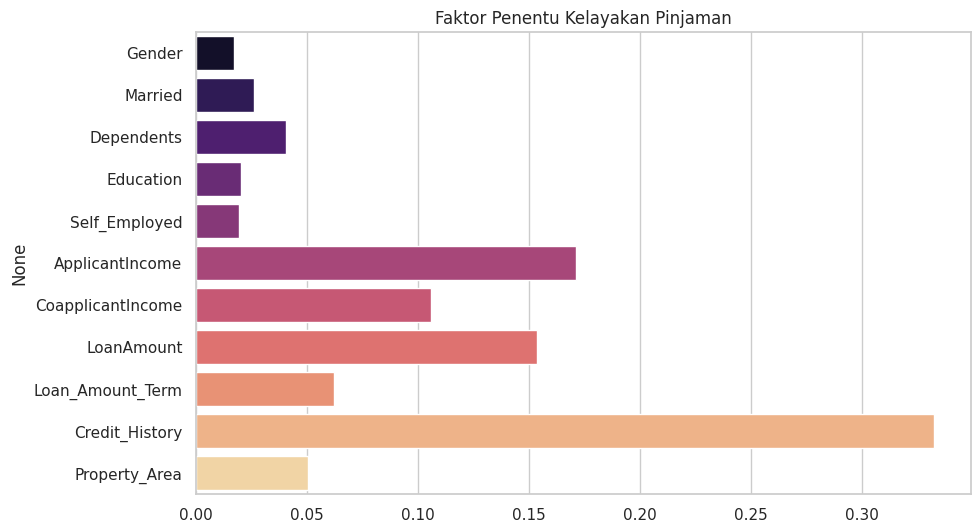

In [ ]:
# 7. VISUALISASI FEATURE IMPORTANCE
importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='magma')
plt.title('Faktor Penentu Kelayakan Pinjaman')
plt.show()